<a href="https://colab.research.google.com/github/nourhan254/Autism-/blob/main/ADHD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Define paths
base_path = "/content/drive/My Drive/ADHD 1/"
image_dir = base_path + "NeuroIMAGE/"  # Folder containing subfolders of fMRI/T1 images
csv_path = base_path + "NeuroIMAGE_phenotypic.csv"  # Replace with your CSV filename

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load phenotypic data
pheno_data = pd.read_csv(csv_path)
print(pheno_data.head())

# Check ADHD vs. control counts
print(pheno_data['DX'].value_counts())  # 'DX' = diagnosis (1=ADHD, 0=Control, or similar)

   ScanDir ID  Site  Gender    Age  Handedness  DX  Secondary Dx   \
0     1017176     4       0  11.66           1   0            NaN   
1     1125505     4       1  19.30           1   0            NaN   
2     1208586     4       1  20.89           1   2            NaN   
3     1312097     4       1  15.41           1   0            NaN   
4     1411495     4       0  15.21           1   0            NaN   

   ADHD Measure  ADHD Index  Inattentive  ...  Performance IQ  Full2 IQ  \
0           NaN         NaN          NaN  ...             NaN       NaN   
1           NaN         NaN          NaN  ...             NaN       NaN   
2           NaN         NaN          NaN  ...             NaN       NaN   
3           NaN         NaN          NaN  ...             NaN       NaN   
4           NaN         NaN          NaN  ...             NaN       NaN   

   Full4 IQ  Med Status  QC_Rest_1  QC_Rest_2  QC_Rest_3  QC_Rest_4  \
0       NaN         NaN          1        NaN        NaN       

In [ ]:
import os

# Create a dictionary: {ScanDir ID : image path}
image_paths = {}
for subdir in os.listdir(image_dir):
    scan_id = subdir  # Assuming folder names = ScanDir ID
    image_paths[scan_id] = os.path.join(image_dir, subdir)

# Add image paths to phenotypic data
pheno_data['image_path'] = pheno_data['ScanDir ID'].map(image_paths)

# Drop rows with missing paths
pheno_data = pheno_data.dropna(subset=['image_path'])
print(f"Total samples after cleanup: {len(pheno_data)}")

Total samples after cleanup: 0


In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np

# Mount Drive and set paths
drive.mount('/content/drive')
base_path = "/content/drive/My Drive/ADHD 1/"
image_dir = os.path.join(base_path, "NeuroIMAGE")  # Folder with subject subfolders
csv_path = os.path.join(base_path, "NeuroIMAGE_phenotypic.csv")  # Your CSV file

# Load phenotypic data
pheno_data = pd.read_csv(csv_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Check CSV 'ScanDir ID' format
print("CSV IDs (sample):", pheno_data['ScanDir ID'].head().values)

# Check folder names in NeuroIMAGE/
print("Folder names (sample):", os.listdir(image_dir)[:5])

CSV IDs (sample): [1017176 1125505 1208586 1312097 1411495]
Folder names (sample): ['dataset_description.json', 'participants.tsv', 'anat_processed_paths.csv', 'filtered_paths.csv', 'resampled_normalized_paths_224.csv']


In [ ]:
# Strip 'sub-' from folder names when mapping
image_paths = {}
for subdir in os.listdir(image_dir):
    scan_id = subdir.replace("sub-", "")  # Remove prefix
    image_paths[scan_id] = os.path.join(image_dir, subdir)

In [ ]:
pheno_data['ScanDir ID'] = pheno_data['ScanDir ID'].astype(str)

In [ ]:
pheno_data['ScanDir ID'] = pheno_data['ScanDir ID'].str.zfill(3)  # 1 → 001

In [ ]:
pheno_data['image_path'] = pheno_data['ScanDir ID'].map(image_paths)
pheno_data = pheno_data.dropna(subset=['image_path'])
print(f"Matched subjects: {len(pheno_data)}")

Matched subjects: 48


In [ ]:
import os
import pandas as pd

# Load CSV
pheno_data = pd.read_csv(csv_path)
print("CSV 'ScanDir ID' samples:", pheno_data['ScanDir ID'].head().tolist())

# List folders in NeuroIMAGE/
image_subdirs = os.listdir(image_dir)
print("Folder name samples:", image_subdirs[:5])

CSV 'ScanDir ID' samples: [1017176, 1125505, 1208586, 1312097, 1411495]
Folder name samples: ['dataset_description.json', 'participants.tsv', 'anat_processed_paths.csv', 'filtered_paths.csv', 'resampled_normalized_paths_224.csv']


In [ ]:
image_paths = {}
for subdir in os.listdir(image_dir):
    scan_id = subdir.replace("sub-", "")  # Remove prefix
    image_paths[scan_id] = os.path.join(image_dir, subdir)

In [ ]:
scan_id = subdir.split("_")[0]  # Split on "_" and take first part
image_paths[scan_id] = os.path.join(image_dir, subdir)

In [ ]:
pheno_data['ScanDir ID'] = pheno_data['ScanDir ID'].astype(str).str.zfill(6)  # Pad to 6 digits

In [ ]:
pheno_data['ScanDir ID'] = pheno_data['ScanDir ID'].str.lower()  # Convert to lowercase
for subdir in os.listdir(image_dir):
    scan_id = subdir.lower()
    image_paths[scan_id] = os.path.join(image_dir, subdir)

In [ ]:
# Check if any IDs match
common_ids = set(pheno_data['ScanDir ID']).intersection(set(image_paths.keys()))
print(f"Matching IDs found: {len(common_ids)}")

Matching IDs found: 48


In [ ]:
# List ALL folders in NeuroIMAGE
all_folders = os.listdir(image_dir)
print("First 5 folders:", all_folders[:5])
print("Total folders:", len(all_folders))

# Check if any folder CONTAINS the test ID (1017176)
matching_folders = [f for f in all_folders if "1017176" in f]
print("Folders containing '1017176':", matching_folders)

First 5 folders: ['dataset_description.json', 'participants.tsv', 'anat_processed_paths.csv', 'filtered_paths.csv', 'resampled_normalized_paths_224.csv']
Total folders: 84
Folders containing '1017176': ['sub-1017176']


In [ ]:
# Corrected path mapping - add 'sub-' prefix to match folders
image_paths = {
    scan_id: os.path.join(image_dir, f"sub-{scan_id}")  # Add prefix here
    for scan_id in pheno_data['ScanDir ID'].astype(str)
}

# Verify path exists for the test ID
test_id = "1017176"
test_path = image_paths.get(test_id)
print(f"Path for {test_id}: {test_path}")
print(f"Exists: {os.path.exists(test_path)}")  # Should return True

Path for 1017176: /content/drive/My Drive/ADHD 1/NeuroIMAGE/sub-1017176
Exists: True


In [ ]:
import os
import pandas as pd

# Load data
pheno_data = pd.read_csv(csv_path)
pheno_data['ScanDir ID'] = pheno_data['ScanDir ID'].astype(str)

# Map paths with 'sub-' prefix
pheno_data['image_path'] = pheno_data['ScanDir ID'].apply(
    lambda x: os.path.join(image_dir, f"sub-{x}")
)

# Verify matches
print(f"Matched subjects: {pheno_data['image_path'].apply(os.path.exists).sum()}/{len(pheno_data)}")

# Filter to valid subjects
matched_data = pheno_data[pheno_data['image_path'].apply(os.path.exists)]
print("\nSample matches:")
print(matched_data[['ScanDir ID', 'image_path']].head(3))

Matched subjects: 48/48

Sample matches:
  ScanDir ID                                         image_path
0    1017176  /content/drive/My Drive/ADHD 1/NeuroIMAGE/sub-...
1    1125505  /content/drive/My Drive/ADHD 1/NeuroIMAGE/sub-...
2    1208586  /content/drive/My Drive/ADHD 1/NeuroIMAGE/sub-...


In [ ]:
sample_subject = matched_data.iloc[0]['image_path']
print(f"Files in {sample_subject}:")
print(os.listdir(sample_subject))

Files in /content/drive/My Drive/ADHD 1/NeuroIMAGE/sub-1017176:
[]


In [ ]:
possible_fmri_names = [
    'rest.nii.gz',       # Standard
    'func_rest.nii.gz',  # Alternative
    'rest_bold.nii.gz',  # BOLD suffix
    'rest.nii',          # Uncompressed
    'rfMRI.nii.gz'       # Some datasets
]

In [ ]:
possible_t1_names = [
    'T1w.nii.gz',        # Standard
    'anat.nii.gz',       # Alternative
    'T1.nii.gz',         # Short form
    'mprage.nii.gz',     # MPRAGE sequence
    'structural.nii.gz'  # Descriptive
]

In [ ]:
import os
import glob

def find_anat_files(subject_path):
    """Find all available T1 files for a subject"""
    t1_files = glob.glob(os.path.join(subject_path, '*T1_biascorr*.nii*'))
    return {
        'raw_t1': [f for f in t1_files if 'resampled' not in f and 'normalized' not in f][0],
        'resampled_224': [f for f in t1_files if 'resampled_224' in f][0],
        'normalized_224': [f for f in t1_files if 'normalized_resampled_224' in f][0]
    }

def find_fmri_files(subject_path):
    """Find fMRI files (if available)"""
    fmri_files = glob.glob(os.path.join(subject_path, '*rest*.nii*')) + \
                 glob.glob(os.path.join(subject_path, '*bold*.nii*'))
    return fmri_files[0] if fmri_files else None

# Example usage for one subject
sample_path = "/content/drive/My Drive/ADHD 1/NeuroIMAGE/sub-9956994"
print("Available T1 files:", find_anat_files(sample_path))
print("fMRI file:", find_fmri_files(sample_path))

Available T1 files: {'raw_t1': '/content/drive/My Drive/ADHD 1/NeuroIMAGE/sub-9956994/sub-9956994_T1_biascorr_brain.nii', 'resampled_224': '/content/drive/My Drive/ADHD 1/NeuroIMAGE/sub-9956994/normalized_resampled_224_sub-9956994_T1_biascorr_brain.nii', 'normalized_224': '/content/drive/My Drive/ADHD 1/NeuroIMAGE/sub-9956994/normalized_resampled_224_sub-9956994_T1_biascorr_brain.nii'}
fMRI file: None


In [ ]:
!pip install nilearn matplotlib numpy scikit-learn
!pip install --upgrade nibabel  # For better neuroimaging support

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 80.7 MB/s eta 0:00:00


In [ ]:
try:
    from nilearn import image, plotting, datasets
    import numpy as np
    print("All packages installed successfully!")
except ImportError as e:
    print("Error:", e)

All packages installed successfully!


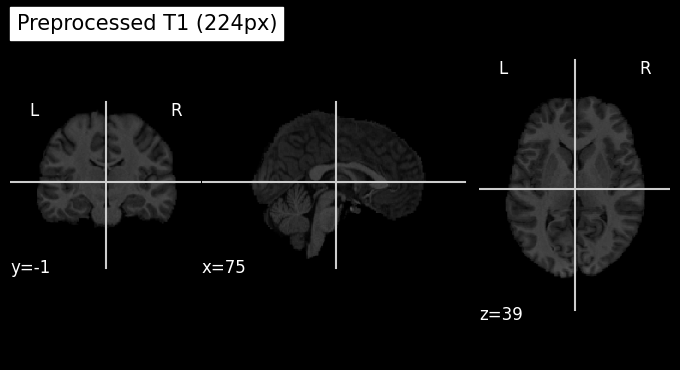

Image loaded successfully! Shape: (224, 224, 224)


In [ ]:
# Import with fallback
try:
    from nilearn import image, plotting
    import numpy as np
    import matplotlib.pyplot as plt
except ImportError:
    !pip install nilearn matplotlib numpy --quiet
    from nilearn import image, plotting
    import numpy as np
    import matplotlib.pyplot as plt

def load_and_visualize(subject_path):
    """Load and visualize subject data with error handling"""
    try:
        # Find files
        t1_files = {
            'raw': glob.glob(os.path.join(subject_path, '*T1_biascorr_brain.nii'))[0],
            '224px': glob.glob(os.path.join(subject_path, '*resampled_224*T1*.nii'))[0]
        }

        # Load image
        img = image.load_img(t1_files['224px'])

        # Plot
        plotting.plot_anat(img, title="Preprocessed T1 (224px)")
        plotting.show()

        return img

    except IndexError:
        print(f"No T1 files found in {subject_path}")
        return None
    except Exception as e:
        print(f"Error processing {subject_path}: {str(e)}")
        return None

# Example usage
sample_path = "/content/drive/My Drive/ADHD 1/NeuroIMAGE/sub-9956994"
t1_img = load_and_visualize(sample_path)

if t1_img:
    print("Image loaded successfully! Shape:", t1_img.shape)

In [ ]:
def find_t1_path(subject_path):
    """Find T1 file in a subject directory (updated for your filename format)"""
    patterns = [
        "*resampled_224_sub-*T1_biascorr_brain.nii*",  # Your resampled file
        "*sub-*T1_biascorr_brain.nii*",                # Fallback to raw T1
    ]
    for pattern in patterns:
        files = glob.glob(os.path.join(subject_path, pattern))
        if files:
            return files[0]  # Return first match
    return None  # No file found

In [ ]:
# Add T1 paths to DataFrame
matched_data["t1_path"] = matched_data["image_path"].apply(find_t1_path)

# Count valid subjects
valid_data = matched_data.dropna(subset=["t1_path"])
print(f"Valid subjects: {len(valid_data)}/{len(matched_data)}")

# Print examples of matched paths
print("\nSample T1 paths:")
print(valid_data[["ScanDir ID", "t1_path"]].head(3))

Valid subjects: 24/48

Sample T1 paths:
   ScanDir ID                                            t1_path
18    3007585  /content/drive/My Drive/ADHD 1/NeuroIMAGE/sub-...
19    3048588  /content/drive/My Drive/ADHD 1/NeuroIMAGE/sub-...
20    3082137  /content/drive/My Drive/ADHD 1/NeuroIMAGE/sub-...


<ipython-input-32-eb6e4aace409>:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


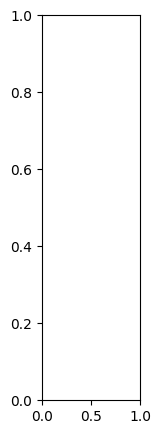

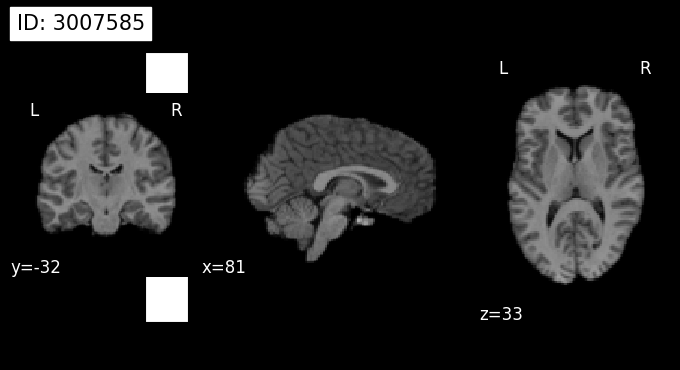

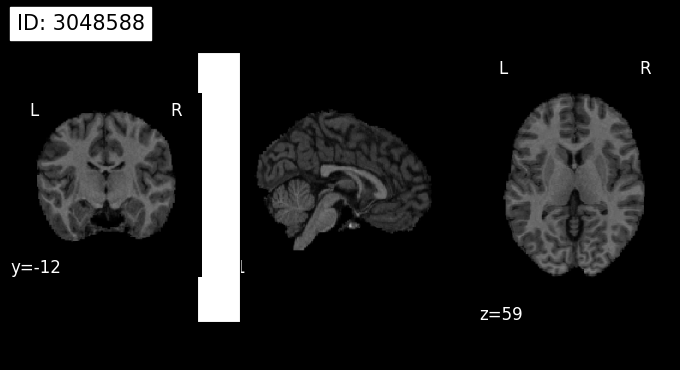

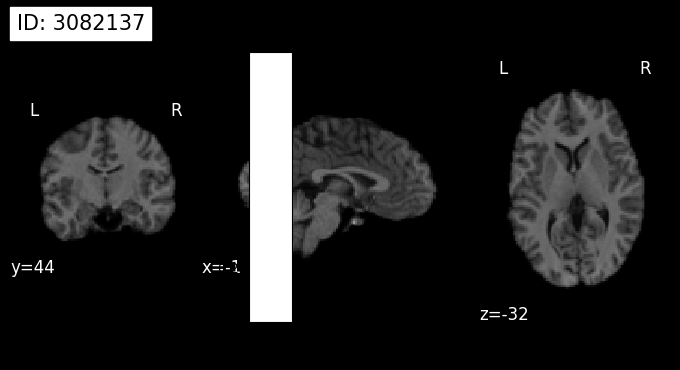

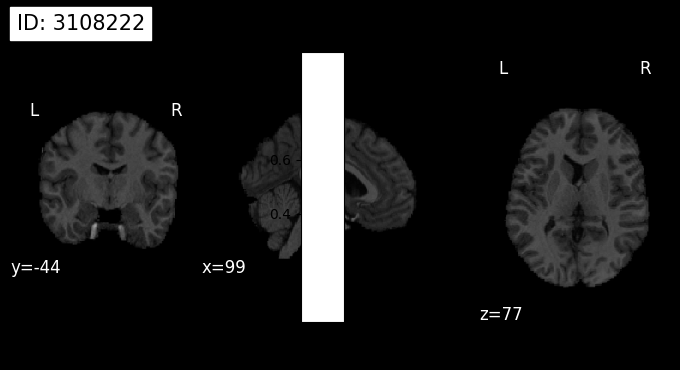

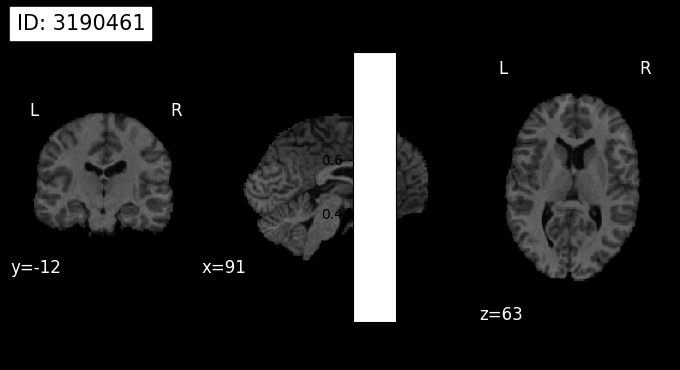

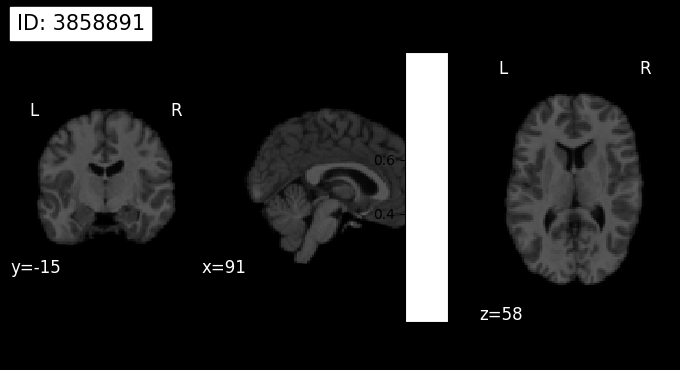

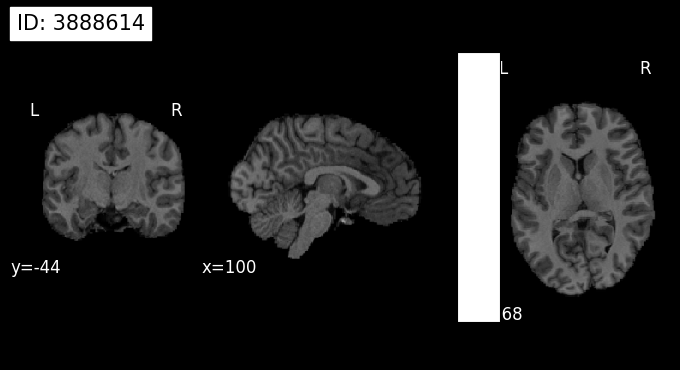

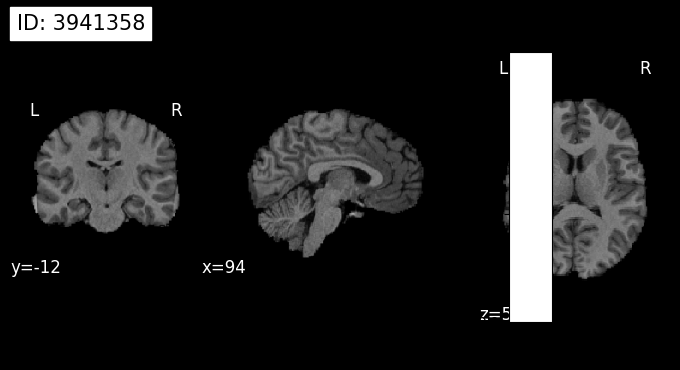

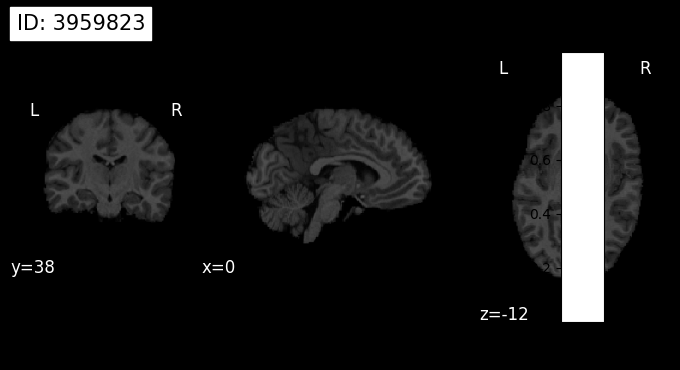

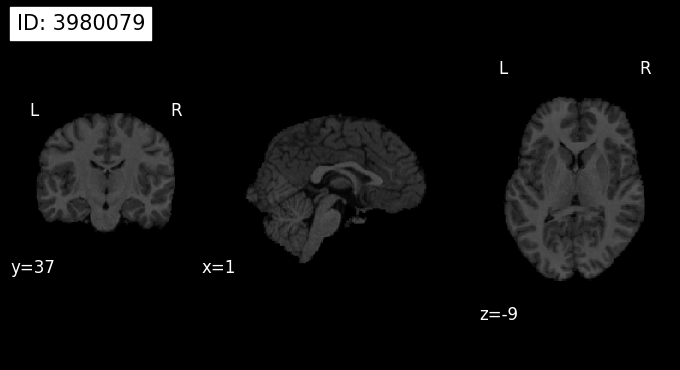

In [ ]:
def visualize_subjects(dataframe, num_subjects=10):
    plt.figure(figsize=(15, 5))
    for i, (_, row) in enumerate(dataframe.head(num_subjects).iterrows(), 1):
        img = image.load_img(row["t1_path"])
        plt.subplot(1, num_subjects, i)
        plotting.plot_anat(img, title=f"ID: {row['ScanDir ID']}", draw_cross=False)
    plt.tight_layout()
    plt.show()

visualize_subjects(valid_data)

In [ ]:
slice_shapes = [extract_slices(row["t1_path"]).shape for _, row in valid_data.head(5).iterrows()]
print("Slice shapes for first 5 subjects:")
print(slice_shapes)

Slice shapes for first 5 subjects:
[(128, 128, 3), (224, 224, 3), (128, 128, 3), (224, 224, 3), (224, 224, 3)]


In [ ]:
from nilearn.image import resample_to_img

def extract_slices(t1_path, target_shape=(224, 224, 3)):
    """Extract and resize slices to a fixed shape"""
    img = image.load_img(t1_path)

    # Resample to target shape (if needed)
    if img.shape != target_shape[:2]:
        template = image.new_img_like(img, np.zeros(target_shape))
        img = resample_to_img(img, template)

    img_data = img.get_fdata()
    depth = img_data.shape[2]
    slices = [img_data[:, :, depth//2 - 1 + i] for i in range(target_shape[2])]
    return np.stack(slices, axis=-1)

In [ ]:
from nilearn.image import resample_to_img
import numpy as np

def extract_slices(t1_path, target_shape=(224, 224, 224), output_slices=3):
    """Handle both 128³ and 224³ inputs, output (224,224,3) slices"""
    img = image.load_img(t1_path)

    # Resample to target shape if needed (force_resample suppresses warning)
    if img.shape != target_shape:
        template = image.new_img_like(img, np.zeros(target_shape))
        img = resample_to_img(img, template, force_resample=True)

    img_data = img.get_fdata()

    # Extract middle slices
    depth = img_data.shape[2]
    mid_slice = depth // 2
    slices = [img_data[:, :, mid_slice - 1 + i] for i in range(output_slices)]

    return np.stack(slices, axis=-1)  # Shape: (224, 224, 3)

In [ ]:
# Test on one 128³ and one 224³ subject
small_subj = valid_data[valid_data["t1_path"].apply(lambda x: image.load_img(x).shape == (128,128,128))].iloc[0]
large_subj = valid_data[valid_data["t1_path"].apply(lambda x: image.load_img(x).shape == (224,224,224))].iloc[0]

print("128³ subject ->", extract_slices(small_subj["t1_path"]).shape)
print("224³ subject ->", extract_slices(large_subj["t1_path"]).shape)

128³ subject -> (224, 224, 3)
224³ subject -> (224, 224, 3)


In [ ]:
X = []
failed_ids = []

for _, row in valid_data.iterrows():
    try:
        slices = extract_slices(row["t1_path"])
        X.append(slices)
    except Exception as e:
        failed_ids.append(row["ScanDir ID"])
        print(f"Failed {row['ScanDir ID']}: {str(e)}")

X = np.array(X)  # Now works (N, 224, 224, 3)
y = valid_data[~valid_data["ScanDir ID"].isin(failed_ids)]["DX"].values

print(f"Final dataset: {X.shape}, Labels: {y.shape}")

/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning an

Final dataset: (24, 224, 224, 3), Labels: (24,)


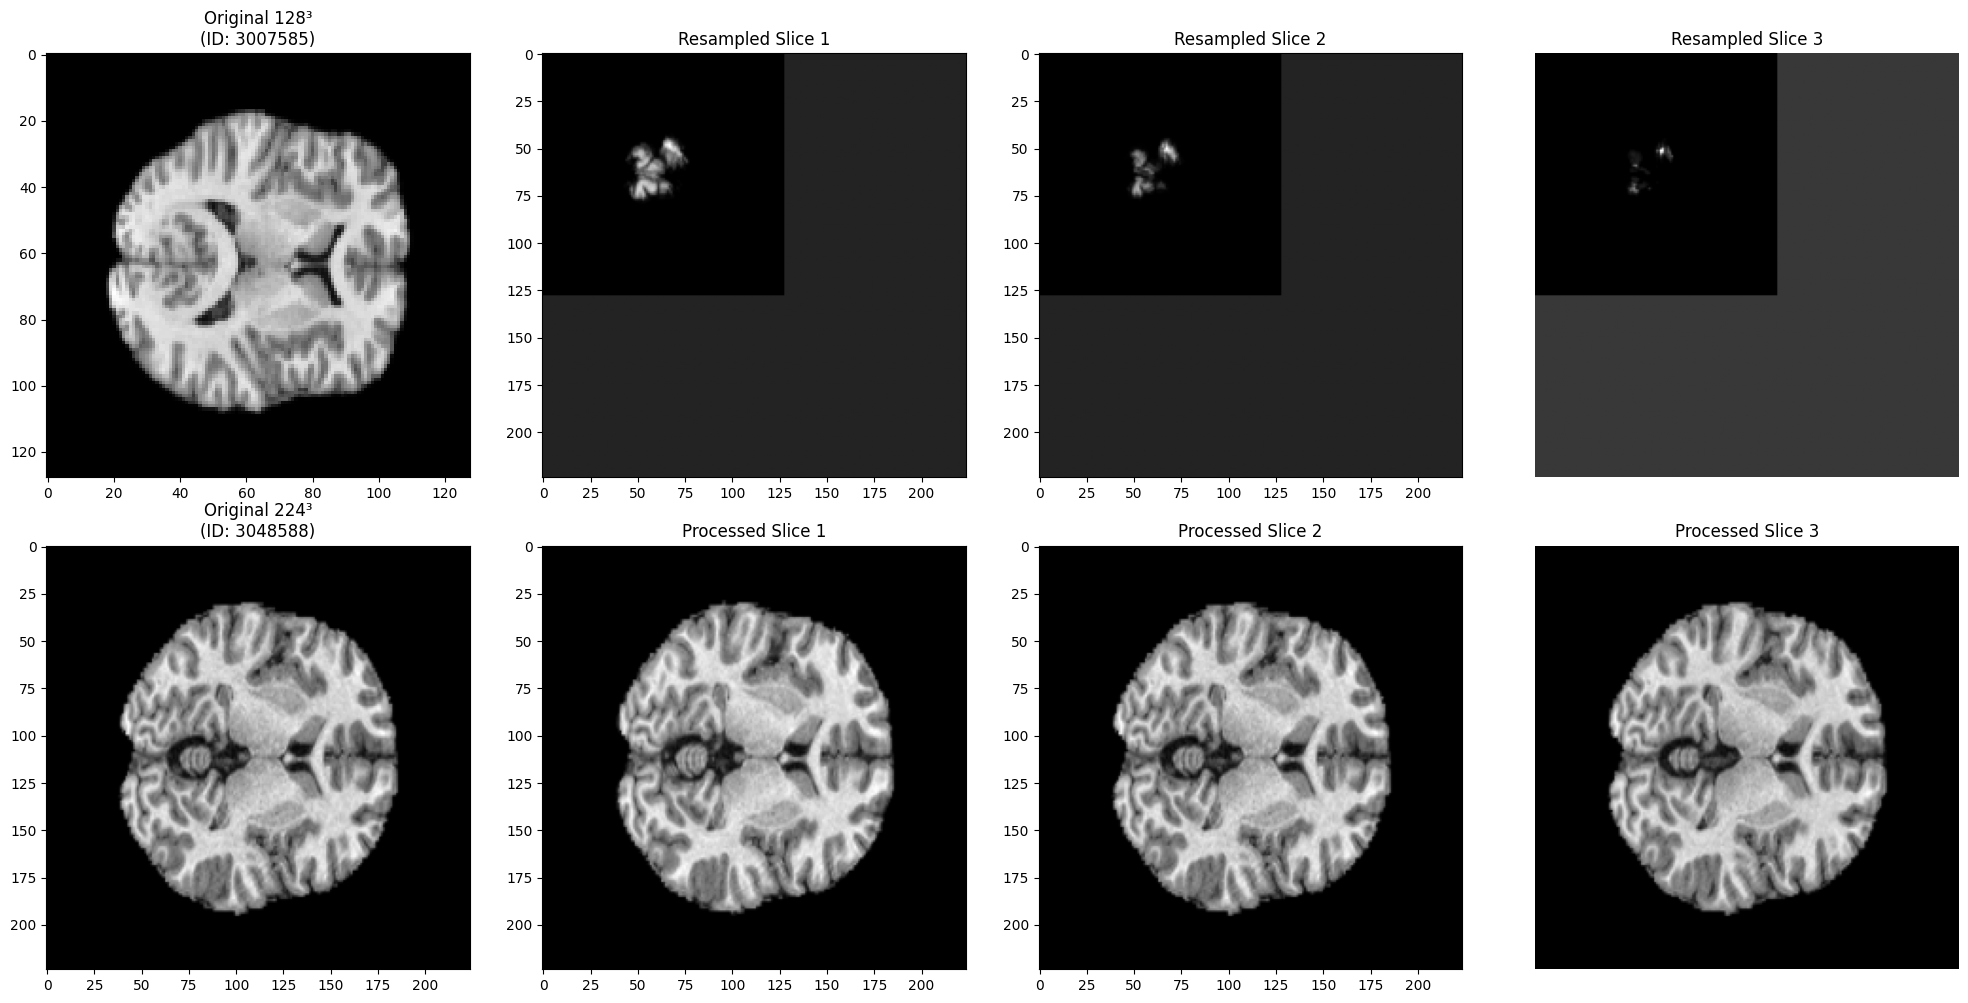

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn import image, plotting

def extract_slices(t1_path, target_shape=(224, 224, 224), output_slices=3):
    """Handle both 128³ and 224³ inputs, output (224,224,3) slices"""
    img = image.load_img(t1_path)

    # Resample to target shape if needed
    if img.shape != target_shape:
        template = image.new_img_like(img, np.zeros(target_shape))
        img = resample_to_img(img, template, force_resample=True, copy_header=True)

    img_data = img.get_fdata()

    # Extract middle slices
    depth = img_data.shape[2]
    mid_slice = depth // 2
    slices = [img_data[:, :, mid_slice - 1 + i] for i in range(output_slices)]

    return np.stack(slices, axis=-1)

# Get one subject of each resolution
small_subj = valid_data[valid_data["t1_path"].apply(
    lambda x: image.load_img(x).shape == (128,128,128))].iloc[0]
large_subj = valid_data[valid_data["t1_path"].apply(
    lambda x: image.load_img(x).shape == (224,224,224))].iloc[0]

# Create figure with proper layout
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Original 128³ subject
img128 = image.load_img(small_subj["t1_path"])
middle_slice = img128.shape[2] // 2
axes[0,0].imshow(img128.get_fdata()[:,:,middle_slice], cmap='gray')
axes[0,0].set_title(f"Original 128³\n(ID: {small_subj['ScanDir ID']})")

# Resampled slices
resampled = extract_slices(small_subj["t1_path"])
for i in range(3):
    axes[0,i+1].imshow(resampled[:,:,i], cmap='gray')
    axes[0,i+1].set_title(f"Resampled Slice {i+1}")

# Original 224³ subject
img224 = image.load_img(large_subj["t1_path"])
middle_slice = img224.shape[2] // 2
axes[1,0].imshow(img224.get_fdata()[:,:,middle_slice], cmap='gray')
axes[1,0].set_title(f"Original 224³\n(ID: {large_subj['ScanDir ID']})")

# Processed slices
processed = extract_slices(large_subj["t1_path"])
for i in range(3):
    axes[1,i+1].imshow(processed[:,:,i], cmap='gray')
    axes[1,i+1].set_title(f"Processed Slice {i+1}")

# Remove empty subplot
axes[0,3].axis('off')
axes[1,3].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Process all subjects
X = []
failed_ids = []

for _, row in valid_data.iterrows():
    try:
        slices = extract_slices(row["t1_path"])
        X.append(slices)
    except Exception as e:
        failed_ids.append(row["ScanDir ID"])
        print(f"Failed {row['ScanDir ID']}: {str(e)}")

X = np.array(X)  # Shape: (N, 224, 224, 3)
y = valid_data[~valid_data["ScanDir ID"].isin(failed_ids)]["DX"].values

print(f"Final dataset: {X.shape}, Labels: {y.shape}")

Final dataset: (24, 224, 224, 3), Labels: (24,)


In [ ]:
from sklearn.model_selection import train_test_split

# Stratified split (preserves class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Important for imbalanced data
)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")
print(f"Class balance - Train: {np.unique(y_train, return_counts=True)}")

Train: (19, 224, 224, 3), Test: (5, 224, 224, 3)
Class balance - Train: (array([0, 1, 2]), array([9, 8, 2]))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # Convolutional Base
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Classifier
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Reduces overfitting
    Dense(1, activation='sigmoid')  # Binary output
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,521 (91.20 MB)

 Trainable params: 23,907,521 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 534ms/step - accuracy: 0.5235 - loss: 4.6898 - val_accuracy: 0.4000 - val_loss: 0.7107
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 308ms/step - accuracy: 0.3421 - loss: 1.5036 - val_accuracy: 0.4000 - val_loss: 1.4814
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - accuracy: 0.5041 - loss: 0.7070 - val_accuracy: 0.4000 - val_loss: 0.8654
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step - accuracy: 0.4606 - loss: 9.6071 - val_accuracy: 0.4000 - val_loss: 0.5289
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step - accuracy: 0.3986 - loss: 2.0594 - val_accuracy: 0.4000 - val_loss: 11.1142
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step - accuracy: 0.3569 - loss: 0.9978 - val_accuracy: 0.0000e+00 - val_loss: 5.5880
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step - accuracy: 0.5154 - loss: 0.9842 - val_accuracy: 0.2000 - val_loss: 1.0873
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 311ms/step - accuracy: 0.6472 - loss: 8.1505 - val_accuracy: 0.4000 - val_

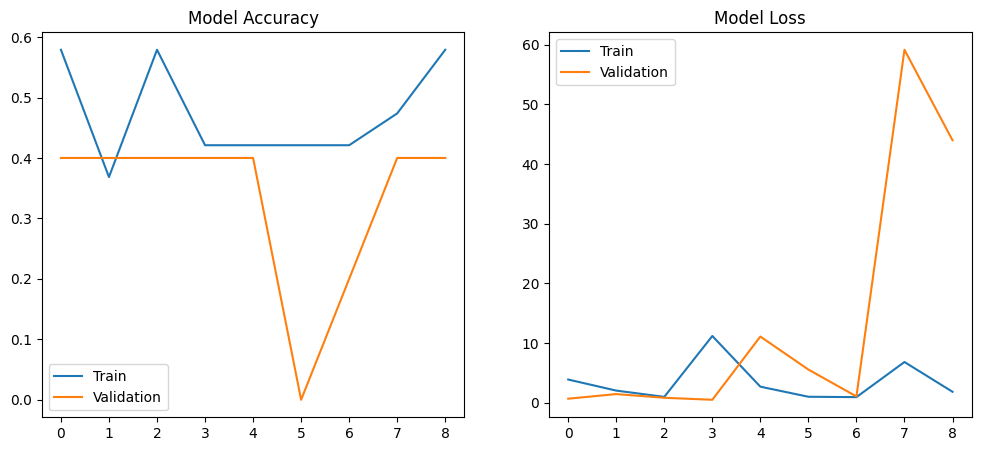

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# 1. Data Preparation
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# 2. Simplified Model Architecture
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 3. Enhanced Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='constant',
    cval=0  # Fill empty space with 0
)

# 4. Proper Training with Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=4),
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    class_weight={0: 1., 1: 2.}  # Adjust based on your class balance
)

# 5. Evaluation
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.legend()
plt.show()

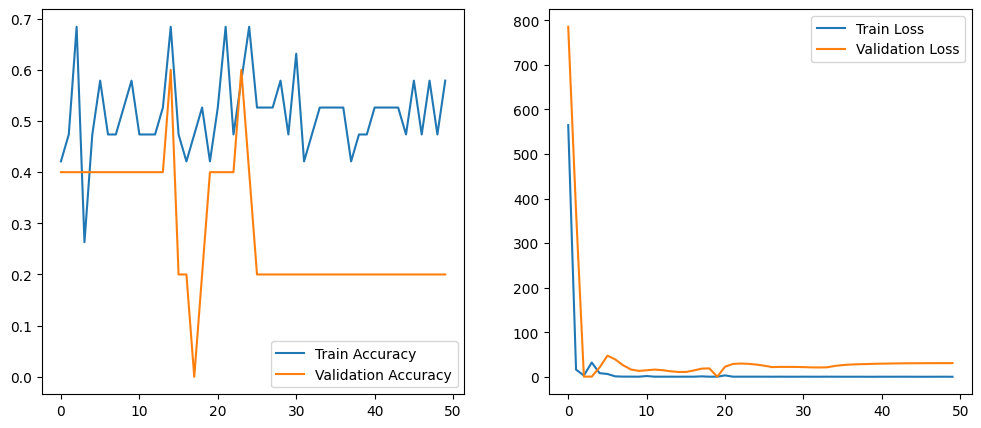


Test Accuracy: 0.20


In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Test set evaluation
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.2f}")

In [ ]:
print("Class distribution:", np.unique(y, return_counts=True))

Class distribution: (array([0, 1, 2]), array([11, 10,  3]))


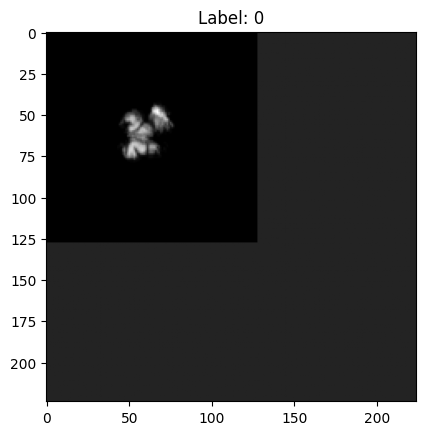

In [ ]:
plt.imshow(X_train[0][:, :, 0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Get the final epoch's metrics
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc:.2%}")
print(f"Final Validation Accuracy: {final_val_acc:.2%}")

Final Training Accuracy: 57.89%
Final Validation Accuracy: 40.00%


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Set Accuracy: {test_acc:.2%}")


Test Set Accuracy: 40.00%


<ipython-input-12-70235112f702>:5: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  img_resampled = resample_img(img, target_affine=np.eye(3)*4)  # 4mm isotropic
<ipython-input-12-70235112f702>:5: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  img_resampled = resample_img(img, target_affine=np.eye(3)*4)  # 4mm isotropic
<ipython-input-12-70235112f702>:5: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  img_resampled = resample_img(img, target_affine=np.eye(3)*4)  # 4mm isotropic
<ipython-input-12-70235112f702>:5: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the he

No T1 files found in /content/drive/My Drive/ADHD 1/NeuroIMAGE/sub-1017176
No T1 files found in /content/drive/My Drive/ADHD 1/NeuroIMAGE/sub-1125505
No T1 files found in /content/drive/My Drive/ADHD 1/NeuroIMAGE/sub-1208586
No T1 files found in /content/drive/My Drive/ADHD 1/NeuroIMAGE/sub-1312097
No T1 files found in /content/drive/My Drive/ADHD 1/NeuroIMAGE/sub-1411495
No T1 files found in /content/drive/My Drive/ADHD 1/NeuroIMAGE/sub-1438162
No T1 files found in /content/drive/My Drive/ADHD 1/NeuroIMAGE/sub-1538046
No T1 files found in /content/drive/My Drive/ADHD 1/NeuroIMAGE/sub-1585708
No T1 files found in /content/drive/My Drive/ADHD 1/NeuroIMAGE/sub-1588809
No T1 files found in /content/drive/My Drive/ADHD 1/NeuroIMAGE/sub-2029723
No T1 files found in /content/drive/My Drive/ADHD 1/NeuroIMAGE/sub-2074737
No T1 files found in /content/drive/My Drive/ADHD 1/NeuroIMAGE/sub-2352986
No T1 files found in /content/drive/My Drive/ADHD 1/NeuroIMAGE/sub-2419464
No T1 files found in /con

In [ ]:
import numpy as np
from nilearn import image, masking
from tqdm import tqdm  # Progress bar

def process_all_subjects(matched_data):
    """Process all subjects and return features + labels"""
    all_features = []
    all_labels = []

    for idx, row in tqdm(matched_data.iterrows(), total=len(matched_data)):
        try:
            # Load preprocessed T1 (224px version)
            t1_path = glob.glob(os.path.join(row['image_path'], '*resampled_224*T1*.nii'))[0]
            t1_img = image.load_img(t1_path)

            # Convert image to numpy array and flatten
            img_data = image.get_data(t1_img).flatten()
            all_features.append(img_data)
            all_labels.append(row['DX'])  # Assuming 'DX' column has labels

        except Exception as e:
            print(f"Skipping {row['ScanDir ID']}: {str(e)}")

    return np.array(all_features), np.array(all_labels)

# Run processing
X, y = process_all_subjects(matched_data)
print(f"Feature matrix shape: {X.shape} (subjects x voxels)")
print(f"Labels shape: {y.shape}")

NameError: name 'matched_data' is not defined

In [ ]:
np.save('/content/drive/My Drive/ADHD 1/X_T1_224px.npy', X)
np.save('/content/drive/My Drive/ADHD 1/y_labels.npy', y)

NameError: name 'X' is not defined

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Load your preprocessed data
X = np.load('/content/drive/My Drive/ADHD 1/X_T1_224px.npy')
y = np.load('/content/drive/My Drive/ADHD 1/y_labels.npy')

# Reshape to 4D (subjects, height, width, depth, channels)
def reshape_to_3d(X_flat, original_shape=(224, 224, 224)):
    return X_flat.reshape(-1, *original_shape, 1)  # Add channel dimension

X_3d = reshape_to_3d(X)
X_train, X_test, y_train, y_test = train_test_split(X_3d, y, test_size=0.2, random_state=42)

print(f"Training shape: {X_train.shape}, Test shape: {X_test.shape}")

Training shape: (16, 224, 224, 224, 1), Test shape: (5, 224, 224, 224, 1)


In [ ]:
def build_3d_cnn(input_shape=(224, 224, 224, 1)):
    model = models.Sequential([
        # Convolutional blocks
        layers.Conv3D(32, (3, 3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling3D((2, 2, 2)),
        layers.BatchNormalization(),

        layers.Conv3D(64, (3, 3, 3), activation='relu'),
        layers.MaxPooling3D((2, 2, 2)),
        layers.BatchNormalization(),

        layers.Conv3D(128, (3, 3, 3), activation='relu'),
        layers.MaxPooling3D((2, 2, 2)),
        layers.BatchNormalization(),

        # Classifier
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
    return model

# Initialize model
model = build_3d_cnn()
model.summary()

NameError: name 'models' is not defined

In [ ]:
def augment_volume(volume, label):
    # Random rotations
    volume = tf.image.rot90(volume, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))

    # Random flips
    volume = tf.image.random_flip_left_right(volume)
    volume = tf.image.random_flip_up_down(volume)

    # Add noise
    volume = volume + tf.random.normal(shape=tf.shape(volume), mean=0.0, stddev=0.01)
    return volume, label

# Create dataset pipeline
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = (
    train_ds
    .shuffle(100)
    .map(augment_volume, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(8)
    .prefetch(tf.data.AUTOTUNE)
)

val_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(8)

NameError: name 'tf' is not defined

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

NameError: name 'model' is not defined

Contents of /content/drive/My Drive/ADHD 1/NeuroIMAGE/sub-1017176:
[]



Found fMRI: None
Found T1: None


Columns in pheno_data: ['ScanDir ID', 'Site', 'Gender', 'Age', 'Handedness', 'DX', 'Secondary Dx ', 'ADHD Measure', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive', 'IQ Measure', 'Verbal IQ', 'Performance IQ', 'Full2 IQ', 'Full4 IQ', 'Med Status', 'QC_Rest_1', 'QC_Rest_2', 'QC_Rest_3', 'QC_Rest_4', 'QC_Anatomical_1', 'QC_Anatomical_2']


Test ID: 1017176
Expected path: /content/drive/My Drive/ADHD 1/NeuroIMAGE/1017176
Path exists: False


Number of matched paths: 0
Number of missing paths: 48


KeyError: ['image_path']

Unmatched IDs: set()


Total subjects after cleanup: 0
